In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Initialize position and velocity of particles
pos= np.zeros((3,1000))
np.random.seed(0)
for j in range(100):
   for i in range(10):
      pos[0,j+100*i:j+100*(i+1)-1]= i%10
for j in range(10):
   for i in range(100):
      pos[1,j+10*i:j+10*(i+1)-1]=i%10
for i in range(1000):
    pos[2,i]=i%10

vel = np.random.rand(3, 1000)
pos=pos*3.636
s=np.sum(vel)
vel= vel-s/1000
rms= np.sqrt(np.sum(vel*vel/1000,axis = 0))
scale= 176/rms
vel=vel*scale
# Constants
dt = 0.000000000000000001
n_steps = 10000
sigma = 3.636
epsilon = 0.185
r_cutoff = 2.5*sigma
box_size = 1000


Function defined which is repeated in every loop to find distance between particles

In [19]:
#function to return distances
def get_dist(i):
    pos_copy = np.copy(pos)
    point = pos_copy[:,i,None]
    pos_dir = pos_copy - point
    dist = np.sqrt(np.sum(pos_dir**2,axis = 0))
    return dist, pos_dir


To store the distance between two particles and update the neighbours list


In [20]:
#updating array distances
distances = np.zeros((1000,1000))
distance_vector=np.zeros((3,1000,1000))
for i in range(1000):
    distances[i,:], distance_vector[:,:,i] = get_dist(i)
# neighbour_list = []
# neighbours=[]
# for i in range(1000):
#     for j in range(1000):    
#         if(distances[i][j]<=r_cutoff):
#             neighbours.append(j)
# neighbour_list.append(neighbours)

neighbours = distances < r_cutoff
friends = distances >= r_cutoff 
friends = distances < r_cutoff +1


Simulation loop begins implementing velocity verlet algorithm
time complexity ~ O(n^3)

5565.608681896346 1.7575536876743805e+45 7.940730889933865e+43 2.173457849778017e+44


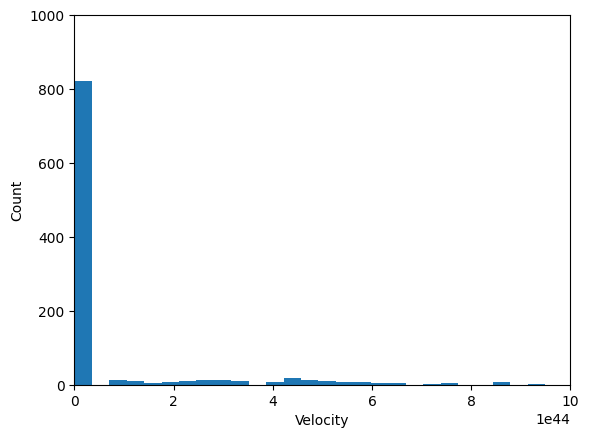

C:\Users\prath\AppData\Local\Temp\ipykernel_16188\670637891.py:53: RuntimeWarning: overflow encountered in double_scalars
  force_new[:,i] += (24*epsilon*(2*(sigma**12/distances[i,j]**13) - (sigma**6/distances[i,j]**7)))*(distance_vector[:,i,j]/distances[i,j])


5565.608681896346 5.2726610630231405e+45 2.38221926698016e+44 6.5203735493340495e+44
5565.608681896346 8.787768438371902e+45 3.970365444966934e+44 1.0867289248890083e+45
5565.608681896346 1.2302875813720665e+46 5.5585116229537056e+44 1.5214204948446116e+45


In [21]:
import time 
# Velocity Verlet algorithm
n_steps = 100
force = np.zeros((3, 1000))
force_new = np.zeros((3, 1000))
distances = distances + 0.00001
k=0
for step in range(n_steps):
    if(k==0):
        for i in range(1000):
            for j,bool in enumerate(list(neighbours[i,:])):
                if bool == False and i==j: continue
                force[:,i] += (24*epsilon*(2*(sigma**12/distances[i,j]**13) - (sigma**6/distances[i,j]**7)))*(distance_vector[:,i,j]/distances[i,j])
    k+=1
    #abs_force = np.linalg.norm(force,axis=0)
    #print(abs_force.min(),abs_force.max(),abs_force.mean(),abs_force.std())

    # Update positions
    pos += vel*dt + 0.5*force*dt**2
    #Check for wall crossings and handle them
    for k in range(1000):
        for j in range(3):
            if (pos[0][k] > box_size):
                pos[0][k] = pos[0][k]-box_size

            if (pos[1][k] > box_size):
                pos[1][k] = pos[0][k]-box_size

            if (pos[2][k] > box_size):
                pos[2][k] = pos[0][k]-box_size    

                if pos[0][k] < 0:
                    pos[0][k] = pos[0][k]+box_size

                if pos[1][k] < 0:
                    pos[1][k] = pos[1][k]+box_size  
                    
                if pos[2][k] < 0:
                    pos[2][k] = pos[2][k]+box_size  
        
    # Update distances
    for k in range(1000):
        distances[k,:], distance_vector[:,:,k] = get_dist(k)
    distances = distances + 0.00001

    neighbours = distances < r_cutoff

    for i in range(1000):
        for j,bool in enumerate(list(neighbours[i,:])):
            if bool == False and i==j: 
                force_new[:,i] = 0
                continue
            force_new[:,i] += (24*epsilon*(2*(sigma**12/distances[i,j]**13) - (sigma**6/distances[i,j]**7)))*(distance_vector[:,i,j]/distances[i,j])

    vel += (force + force_new)*dt/2

    force = force_new

    abs_vel = np.linalg.norm(vel, axis=0)
    print(abs_vel.min(),abs_vel.max(),abs_vel.mean(),abs_vel.std())
    vel1=np.sqrt(vel*vel)   
       
    #Plot velocity of particles
    if(step%10==0):
         plt.hist(np.linalg.norm(vel1, axis=0), bins=50)
         plt.xlim(0, 10e44)
         plt.ylim(0,1000)
         plt.xlabel('Velocity')
         plt.ylabel('Count')
         plt.show() 
    #print(step)  
